In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import pdb
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
import sklearn.metrics as metrics

# Trimming Data

In [2]:
all_nba = pd.read_csv("Data/all_nba_trimmed_data.csv")
cleaned_all_nba =  all_nba.drop('Unnamed: 0', 1)
cleaned_all_nba = cleaned_all_nba.drop('Name', 1)
cleaned_all_nba = cleaned_all_nba.drop('Season', 1)
cleaned_all_nba = cleaned_all_nba.drop('STL', 1)
cleaned_all_nba = cleaned_all_nba.drop('All-Star', 1)
cleaned_all_nba = cleaned_all_nba.drop('BLK', 1)
forwards_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'F']
guards_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'G']
centers_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'C']

In [3]:
cleaned_all_nba = cleaned_all_nba.drop('Pos', 1)
forwards_all_nba = forwards_all_nba.drop('Pos', 1)
guards_all_nba = guards_all_nba.drop('Pos', 1)
#guards_all_nba  = guards_all_nba.drop('AST', 1)
centers_all_nba = centers_all_nba.drop('Pos', 1)

In [4]:
dataAll = cleaned_all_nba.to_numpy()
dataAll_F = forwards_all_nba.to_numpy()
dataAll_G = guards_all_nba.to_numpy()
dataAll_C = centers_all_nba.to_numpy()

In [5]:
actual_all_nba = cleaned_all_nba.loc[cleaned_all_nba['All-NBA'] == 1]
not_all_nba = cleaned_all_nba.loc[cleaned_all_nba['All-NBA'] == 0]

# Visualizing Data

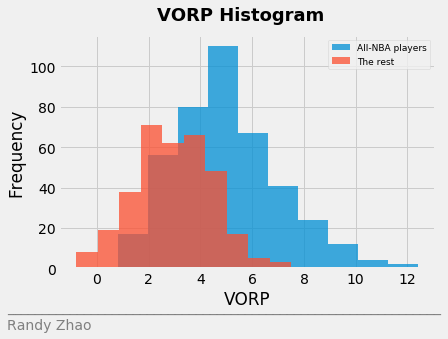

In [6]:
plt.style.use('fivethirtyeight')
vorp_hist, ax = plt.subplots()

ax.hist(actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('VORP')
ax.set_ylabel('Frequency')

vorp_hist.suptitle("VORP Histogram", weight = 'bold', size = 18)

vorp_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

vorp_hist.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

vorp_hist.savefig('Figures/vorp_hist.png', dpi = 400, bbox_inches = 'tight')

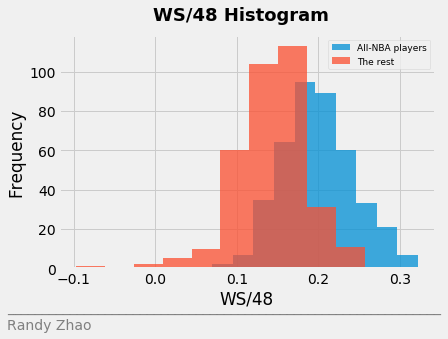

In [7]:
plt.style.use('fivethirtyeight')
ws_hist, ax = plt.subplots()

ax.hist(actual_all_nba['WS/48'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['WS/48'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('WS/48')
ax.set_ylabel('Frequency')

ws_hist.suptitle("WS/48 Histogram", weight = 'bold', size = 18)

ws_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ws_hist.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

ws_hist.savefig('Figures/ws_hist.png', dpi = 400, bbox_inches = 'tight')

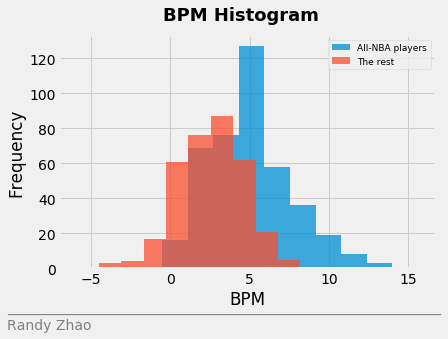

In [8]:
bpm_hist, ax = plt.subplots()

ax.hist(actual_all_nba['BPM'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['BPM'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')

bpm_hist.suptitle("BPM Histogram", weight = 'bold', size = 18)

bpm_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_hist.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')
bpm_hist.savefig('Figures/bpm_hist.png', dpi = 400, bbox_inches = 'tight')

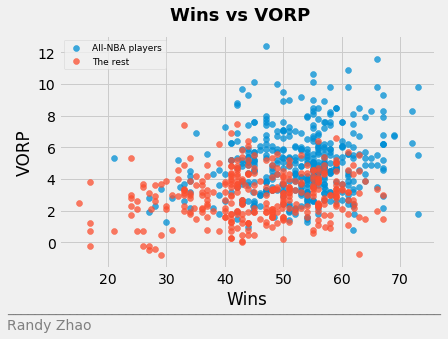

In [9]:
pposs_VORP, ax = plt.subplots()

ax.scatter(actual_all_nba['Wins'], actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['Wins'], not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('Wins')
ax.set_ylabel('VORP')

pposs_VORP.suptitle("Wins vs VORP", weight = 'bold', size = 18)

pposs_VORP.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

pposs_VORP.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

pposs_VORP.savefig('Figures/pposs_VORP.png', dpi = 400, bbox_inches = 'tight')

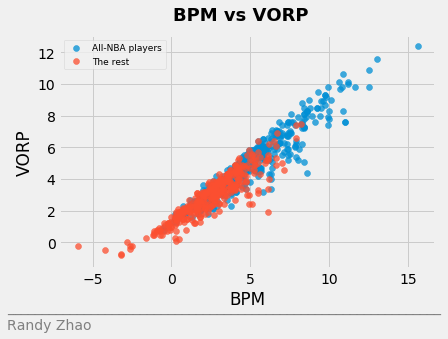

In [10]:
bpm_vorp, ax = plt.subplots()

ax.scatter(actual_all_nba['BPM'], actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['BPM'], not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('BPM')
ax.set_ylabel('VORP')

bpm_vorp.suptitle("BPM vs VORP", weight = 'bold', size = 18)

bpm_vorp.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_vorp.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

bpm_vorp.savefig('Figures/bpm_vorp.png', dpi = 400, bbox_inches = 'tight')

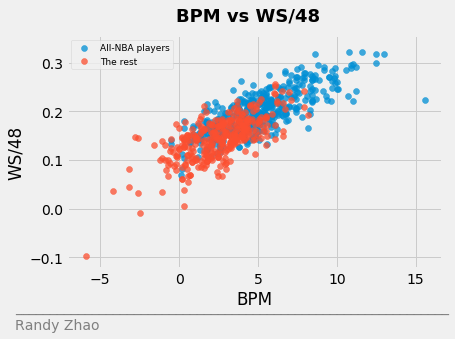

In [11]:
bpm_ws, ax = plt.subplots()

ax.scatter(actual_all_nba['BPM'], actual_all_nba['WS/48'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['BPM'], not_all_nba['WS/48'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "DejaVu Sans"})

ax.set_xlabel('BPM')
ax.set_ylabel('WS/48')

bpm_ws.suptitle("BPM vs WS/48", weight = 'bold', size = 18)

bpm_ws.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_ws.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

bpm_ws.savefig('Figures/bpm_ws.png', dpi = 400, bbox_inches = 'tight')

# Create Models

In [12]:
X = dataAll[:, range(0, (dataAll.shape[1] - 1))] # getting all columns except last one
y = dataAll[:, -1] # getting only the last column
val_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size)
eval_set = [(X_val, y_val)]

In [13]:
svmclf = svm.SVC(kernel='poly',gamma=0.001, probability = 1)
svmclf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
X_F = dataAll_F[:, range(0, (dataAll_F.shape[1] - 1))] # getting all columns except last one
y_F = dataAll_F[:, -1] # getting only the last column
val_size = 0.2
X_train_F, X_val_F, y_train_F, y_val_F = train_test_split(X_F, y_F, test_size = val_size)
eval_set_F = [(X_val_F, y_val_F)]

In [15]:
svmclf_f = svm.SVC(kernel='rbf',gamma=0.001, probability = 1)
svmclf_f.fit(X_train_F, y_train_F)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
X_C = dataAll_C[:, range(0, (dataAll_C.shape[1] - 1))] # getting all columns except last one
y_C = dataAll_C[:, -1] # getting only the last column
val_size = 0.1
X_train_C, X_val_C, y_train_C, y_val_C = train_test_split(X_C, y_C, test_size = val_size)
eval_set_C = [(X_val_C, y_val_C)]

In [17]:
svmclf_c = svm.SVC(kernel='rbf',gamma=0.001, probability = 1)
svmclf_c.fit(X_train_C, y_train_C)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
X_G = dataAll_G[:, range(0, (dataAll_G.shape[1] - 1))] # getting all columns except last one
y_G = dataAll_G[:, -1] # getting only the last column
val_size = 0.2
X_train_G, X_val_G, y_train_G, y_val_G = train_test_split(X_G, y_G, test_size = val_size)
eval_set_G= [(X_val_G, y_val_G)]

In [19]:
svmclf_g = svm.SVC(kernel='poly',gamma=0.001, probability = 1)
svmclf_g.fit(X_train_G, y_train_G)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Basic Goodness of Fit

In [20]:
def scores(model, xtest, ytest):
    y_pred = model.predict(xtest)
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(ytest, y_pred))
    print("Recall: %.3f" % metrics.recall_score(ytest, y_pred))
    print("Precision: %.3f" % metrics.precision_score(ytest, y_pred))
    print("F1: %.3f" % metrics.f1_score(ytest, y_pred))

    proba = model.predict_proba(xtest)
    pos_prob = proba[:, 1]
    print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytest, pos_prob))
    print("Log loss: %.3f" % metrics.log_loss(ytest, proba))
    
    cv = cross_val_score(model, xtest, ytest, cv = 3, scoring = 'accuracy')
    print("Accuracy (cross validation score): %0.3f (+/- %0.3f)" % (cv.mean(), cv.std() * 2))
    
    return y_pred

In [21]:
print("Scores for SVC_G")
y_svc_g = scores(svmclf_g, X_val_G, y_val_G)

Scores for SVC_G
Accuracy score: 0.758
Recall: 0.724
Precision: 0.750
F1: 0.737
Area under ROC curve: 0.780
Log loss: 0.602
Accuracy (cross validation score): 0.694 (+/- 0.040)


In [22]:
print("Scores for SVC_F")
y_svc_f = scores(svmclf_f, X_val_F, y_val_F)

Scores for SVC_F
Accuracy score: 0.786
Recall: 0.800
Precision: 0.800
F1: 0.800
Area under ROC curve: 0.901
Log loss: 0.395
Accuracy (cross validation score): 0.681 (+/- 0.251)


In [23]:
print("Scores for SVC_C")
y_svc_c = scores(svmclf_c, X_val_C, y_val_C)

Scores for SVC_C
Accuracy score: 0.706
Recall: 0.778
Precision: 0.700
F1: 0.737
Area under ROC curve: 0.792
Log loss: 0.538
Accuracy (cross validation score): 0.467 (+/- 0.094)


In [24]:
print("Scores for SVC")
y_svc = scores(svmclf, X_val, y_val)

Scores for SVC
Accuracy score: 0.840
Recall: 0.875
Precision: 0.833
F1: 0.854
Area under ROC curve: 0.936
Log loss: 0.341
Accuracy (cross validation score): 0.840 (+/- 0.062)


# Confusion Matrices

In [25]:
def confusion_matrix(ytest, y_pred, model_name):
    cm = metrics.confusion_matrix(ytest, y_pred)

    plt.style.use("fivethirtyeight")
    z, ax = plt.subplots()

    sns.heatmap(cm, annot=True, ax = ax, linewidth = 2, fmt='g')

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    z.suptitle("%s Confusion Matrix" % model_name.upper(), weight = 'bold', size = 18, x = .45)
    
    z.text(x = 0, y = -0.08,
        s = '__________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

    z.text(x = 0, y = -.14,
        s = 'Randy Zhao',
        fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

    z.savefig('Figures/%s_cm.png' % model_name, dpi = 400, bbox_inches = 'tight')
    

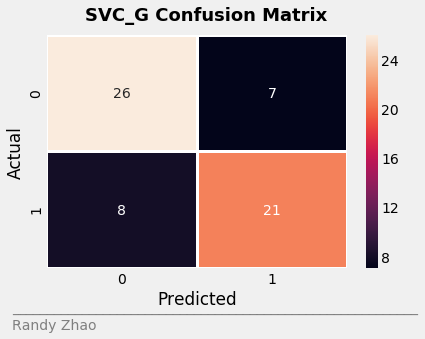

In [26]:
confusion_matrix(y_val_G, y_svc_g, 'SVC_G')

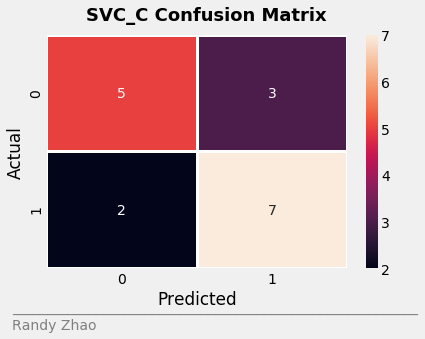

In [27]:
confusion_matrix(y_val_C, y_svc_c, 'SVC_C')

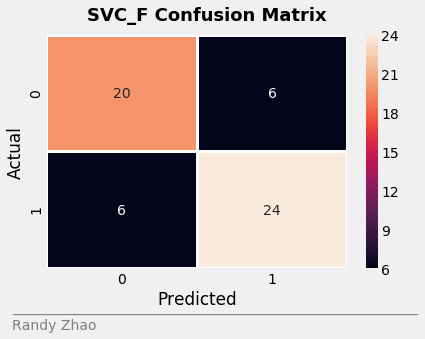

In [28]:
confusion_matrix(y_val_F, y_svc_f, 'SVC_F')

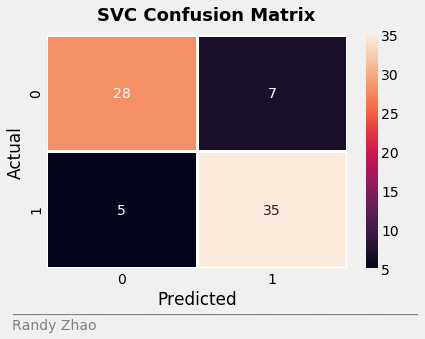

In [29]:
confusion_matrix(y_val, y_svc, 'SVC')

# Creating Test Data

In [30]:
test_nba = pd.read_csv("Data/test_nba_data_trimmed.csv")
names = test_nba["Name"]
cleaned_test =  test_nba.drop('Unnamed: 0', 1)
cleaned_test = cleaned_test.drop('Season', 1)
cleaned_test = cleaned_test.drop('STL', 1)
cleaned_test = cleaned_test.drop('All-Star', 1)
#cleaned_test = cleaned_test.drop('BLK', 1)
cleaned_test = cleaned_test.drop('All-NBA', 1)

forwards_test = cleaned_test[cleaned_test['Pos'] == 'F']
forwards_test = forwards_test.drop('Pos', 1)
forwards_test = forwards_test.drop('BLK', 1)

guards_test = cleaned_test[cleaned_test['Pos'] == 'G']
guards_test = guards_test.drop('Pos', 1)
guards_test = guards_test.drop('BLK', 1)
#guards_test = guards_test.drop('AST', 1)

centers_test = cleaned_test[cleaned_test['Pos'] == 'C']
centers_test = centers_test.drop('Pos', 1)

# cleaned_test = cleaned_test.drop('Pos', 1)
cleaned_test = cleaned_test.drop('BLK', 1)
cleaned_test.head()
testData = cleaned_test.to_numpy()
testData_F = forwards_test.to_numpy()
testData_G = guards_test.to_numpy()
testData_C = guards_test.to_numpy()

# ROC curve

In [31]:
proba_g = svmclf_g.predict_proba(X_val_G)
pos_prob_g = proba_g[:, 1]
fpr_g, tpr_g, threshold_g = metrics.roc_curve(y_val_G, pos_prob_g)

proba_f = svmclf_f.predict_proba(X_val_F)
pos_prob_f = proba_f[:, 1]
fpr_f, tpr_f, threshold_f = metrics.roc_curve(y_val_F, pos_prob_f)

proba_c = svmclf_c.predict_proba(X_val_C)
pos_prob_c = proba_c[:, 1]
fpr_c, tpr_c, threshold_c = metrics.roc_curve(y_val_C, pos_prob_c)

proba = svmclf.predict_proba(X_val)
pos_prob = proba[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_val, pos_prob)

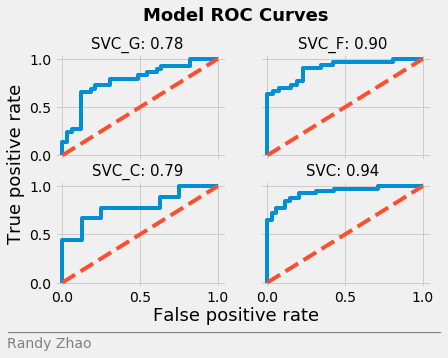

In [32]:
plt.style.use('fivethirtyeight')

roc, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex = True)

#fpr, tpr, pos_prob = roc_curve(svmclf_g)
ax1.plot(fpr_g, tpr_g)
ax1.plot([0, 1], [0, 1], linestyle = '--')
ax1.set_title("SVC_G: %.2f" % metrics.roc_auc_score(y_val_G, pos_prob_g), size = 15, x = .485, ha = 'center')

#fpr, tpr, pos_prob = roc_curve(svmclf_f)
ax2.plot(fpr_f, tpr_f)
ax2.plot([0, 1], [0, 1], linestyle = '--')
ax2.set_title("SVC_F: %.2f" % metrics.roc_auc_score(y_val_F, pos_prob_f), size = 15, x = .485, ha = 'center')

#fpr, tpr, pos_prob = roc_curve(svmclf_c)
ax3.plot(fpr_c, tpr_c)
ax3.plot([0, 1], [0, 1], linestyle = '--')
ax3.set_title("SVC_C: %.2f" % metrics.roc_auc_score(y_val_C, pos_prob_c), size = 15, x = .485, ha = 'center')


#fpr, tpr, pos_prob = roc_curve(svmclf)
ax4.plot(fpr, tpr)
ax4.plot([0, 1], [0, 1], linestyle = '--')
ax4.set_title("SVC: %.2f" % metrics.roc_auc_score(y_val, pos_prob), size = 15, x = .485, ha = 'center')

roc.text(-0.03, 0.5, "True positive rate", va='center', rotation='vertical', size = 18)
roc.text(0.5, -0.045, "False positive rate", ha = 'center', size = 18)

roc.suptitle("Model ROC Curves", y = 1.045, weight = 'bold', size = 18)

roc.text(x = -0.03, y = -0.08,
        s = '______________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

roc.text(x = -0.03, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

roc.savefig('Figures/roc.png', dpi = 400, bbox_inches = 'tight')

# Predict

In [33]:
guards = {}
forwards = {}
centers = {}
allplayers = {}
for i in range(len(names)):
    #print(str(i)+" "+names[i]+" "+str(svmclf.predict_proba([testData[i][2:]])[0][1]))
    prob = 0
    pos = testData[i][1]
    if pos == 'G':
        print(str(i)+" "+names[i]+" "+str(svmclf_g.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_g.predict_proba([testData[i][2:]])[0][1]
        guards[names[i]] = [pos, prob]
    elif pos == 'F':
        print(str(i)+" "+names[i]+" "+str(svmclf_f.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_f.predict_proba([testData[i][2:]])[0][1]
        forwards[names[i]] = [pos, prob]
    elif pos == 'C':
        print(str(i)+" "+names[i]+" "+str(svmclf_c.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_c.predict_proba([testData[i][2:]])[0][1]
        centers[names[i]] = [pos, prob]
    allplayers[names[i]] = svmclf.predict_proba([testData[i][2:]])[0][1]

0 James Harden 0.9999999997080303
1 Giannis Antetokounmpo 0.9999892337055013
2 Stephen Curry 0.9821116165363942
3 LeBron James 0.8231985823830503
4 Kevin Durant 0.9507930382626067
5 Kawhi Leonard 0.9685201206132016
6 Anthony Davis 0.5403562457896397
7 Kevin Durant 0.9507930382626067
8 Nikola Jokic 0.9493659113447983
9 Paul George 0.8975357683431798
10 Kyrie Irving 0.8930982587457474
11 Joel Embiid 0.9346322574227737
12 Rudy Gobert 0.8651127503264607
13 Damian Lillard 0.9610924728038213
14 Karl-Anthony Towns 0.6451303258802766
15 Blake Griffin 0.6959673309446681
16 Russell Westbrook 0.7825061468410179
17 Jimmy Butler 0.16447069478046947
18 Kemba Walker 0.5198676373187288
19 Ben Simmons 0.2120774588706387
20 Kyle Lowry 0.1836045709398109
21 Bradley Beal 0.16697099212327537
22 Mike Conley 0.17769166019748225
23 Jrue Holiday 0.10216516805367747
24 LaMarcus Aldridge 0.4404782412988566
25 Nikola Vucevic 0.7923804443004399
26 Victor Oladipo 0.14845534927427542
27 Klay Thompson 0.1188515858406

In [34]:
guards_prob = sorted(guards.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
print(sorted(guards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)) 

[('James Harden', ['G', 0.9999999997080303]), ('Stephen Curry', ['G', 0.9821116165363942]), ('Damian Lillard', ['G', 0.9610924728038213]), ('Kyrie Irving', ['G', 0.8930982587457474]), ('Russell Westbrook', ['G', 0.7825061468410179]), ('DAngelo Russell', ['G', 0.5512914428606654]), ('Kemba Walker', ['G', 0.5198676373187288]), ('Ben Simmons', ['G', 0.2120774588706387]), ('Kyle Lowry', ['G', 0.1836045709398109]), ('Mike Conley', ['G', 0.17769166019748225]), ('Bradley Beal', ['G', 0.16697099212327537]), ('Jimmy Butler', ['G', 0.16447069478046947]), ('Victor Oladipo', ['G', 0.14845534927427542]), ('Klay Thompson', ['G', 0.11885158584064164]), ('Jrue Holiday', ['G', 0.10216516805367747])]


In [35]:
forwards_prob = sorted(forwards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)
print(sorted(forwards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)) 

[('Giannis Antetokounmpo', ['F', 0.9999892337055013]), ('Kawhi Leonard', ['F', 0.9685201206132016]), ('Kevin Durant', ['F', 0.9507930382626067]), ('Paul George', ['F', 0.8975357683431798]), ('LeBron James', ['F', 0.8231985823830503]), ('Blake Griffin', ['F', 0.6959673309446681]), ('Khris Middleton', ['F', 0.3396870818267355])]


In [36]:
centers_prob = sorted(centers.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
print(sorted(centers.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True))

[('Nikola Jokic', ['C', 0.9493659113447983]), ('Joel Embiid', ['C', 0.9346322574227737]), ('Rudy Gobert', ['C', 0.8651127503264607]), ('Nikola Vucevic', ['C', 0.7923804443004399]), ('Karl-Anthony Towns', ['C', 0.6451303258802766]), ('Anthony Davis', ['C', 0.5403562457896397]), ('LaMarcus Aldridge', ['C', 0.4404782412988566])]


In [37]:
total_list = guards_prob+forwards_prob+centers_prob
avg_list = []
for i in range(len(total_list)):
    avg_proba = (total_list[i][1][1] +  allplayers[total_list[i][0]]) / 2
    avg_list.append( [total_list[i][0], total_list[i][1][0], avg_proba] )
    total_list[i] = [total_list[i][0], total_list[i][1][1], allplayers[total_list[i][0]]]
print(sorted(avg_list, key = 
            lambda kv:kv[2], reverse=True))

[['James Harden', 'G', 0.9999999996026575], ['Giannis Antetokounmpo', 'F', 0.9999935131065941], ['Stephen Curry', 'G', 0.9748060346403882], ['Nikola Jokic', 'C', 0.9661897439114039], ['Damian Lillard', 'G', 0.9596306071222944], ['Joel Embiid', 'C', 0.9504441399286863], ['Kevin Durant', 'F', 0.9421198059602789], ['Kawhi Leonard', 'F', 0.9173779604895845], ['Paul George', 'F', 0.8865992343372959], ['Kyrie Irving', 'G', 0.86313037690958], ['Rudy Gobert', 'C', 0.8540897948503869], ['Russell Westbrook', 'G', 0.8492736360904197], ['Nikola Vucevic', 'C', 0.8232632346517592], ['Karl-Anthony Towns', 'C', 0.7351181242313258], ['LeBron James', 'F', 0.706987095667706], ['Blake Griffin', 'F', 0.6623903777645493], ['Kemba Walker', 'G', 0.5706967577668185], ['DAngelo Russell', 'G', 0.5645700251364596], ['Anthony Davis', 'C', 0.5572629859156311], ['LaMarcus Aldridge', 'C', 0.4628510871180279], ['Ben Simmons', 'G', 0.31194293981697835], ['Khris Middleton', 'F', 0.2674935440891397], ['Bradley Beal', 'G'

In [38]:
def get_allnba(all_list):
    cur_team = {}
    cur_team['G'] = 0
    cur_team['F'] = 0
    cur_team['C'] = 0
    team_assign = {}
    for player in all_list:
        name = player[0]
        pos = player[1]
        proba = player[2]
        place = cur_team[pos]
        if not pos == 'C':
            team = (place // 2) + 1
        else:
            team = place + 1
        team = min(team, 4)
        team_assign[name] = [team, proba]
        cur_team[pos] += 1
    print(team_assign)

In [39]:
get_allnba(sorted(avg_list, key = 
            lambda kv:kv[2], reverse=True))

{'James Harden': [1, 0.9999999996026575], 'Giannis Antetokounmpo': [1, 0.9999935131065941], 'Stephen Curry': [1, 0.9748060346403882], 'Nikola Jokic': [1, 0.9661897439114039], 'Damian Lillard': [2, 0.9596306071222944], 'Joel Embiid': [2, 0.9504441399286863], 'Kevin Durant': [1, 0.9421198059602789], 'Kawhi Leonard': [2, 0.9173779604895845], 'Paul George': [2, 0.8865992343372959], 'Kyrie Irving': [2, 0.86313037690958], 'Rudy Gobert': [3, 0.8540897948503869], 'Russell Westbrook': [3, 0.8492736360904197], 'Nikola Vucevic': [4, 0.8232632346517592], 'Karl-Anthony Towns': [4, 0.7351181242313258], 'LeBron James': [3, 0.706987095667706], 'Blake Griffin': [3, 0.6623903777645493], 'Kemba Walker': [3, 0.5706967577668185], 'DAngelo Russell': [4, 0.5645700251364596], 'Anthony Davis': [4, 0.5572629859156311], 'LaMarcus Aldridge': [4, 0.4628510871180279], 'Ben Simmons': [4, 0.31194293981697835], 'Khris Middleton': [4, 0.2674935440891397], 'Bradley Beal': [4, 0.18958211534977235], 'Kyle Lowry': [4, 0.18

In [40]:
headers = ['Name', 'Pos Proba', 'Total Proba']
df = pd.DataFrame(total_list, columns=headers)

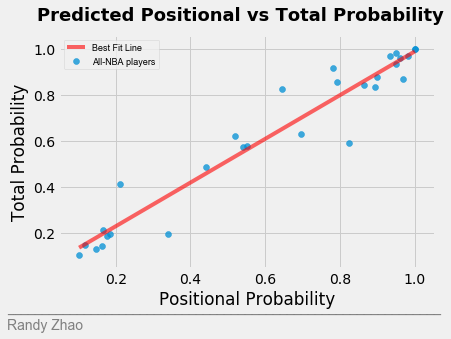

In [41]:
proba, ax = plt.subplots()

ax.scatter(df['Pos Proba'], df['Total Proba'], alpha = .75, label = 'All-NBA players')

ax.plot(np.unique(df['Pos Proba']), 
        np.poly1d(np.polyfit(df['Pos Proba'], df['Total Proba'], 1))(np.unique(df['Pos Proba'])),
       alpha =  0.6, label = 'Best Fit Line', color = 'red')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('Positional Probability')
ax.set_ylabel('Total Probability')

proba.suptitle("Predicted Positional vs Total Probability", weight = 'bold', size = 18)

proba.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

proba.text(x = -0.04, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

proba.savefig('Figures/proba.png', dpi = 400, bbox_inches = 'tight')

In [42]:
kmeans = KMeans(n_clusters = 4, random_state = 99)

x = np.column_stack((df['Pos Proba'], df['Total Proba']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [43]:
clusters = {}
for name, j in zip(df['Name'], y_kmeans):
    clusters[name] = j
print(sorted(clusters.items(), key = 
            lambda kv:kv[1]))

[('DAngelo Russell', 0), ('Kemba Walker', 0), ('Anthony Davis', 0), ('LaMarcus Aldridge', 0), ('James Harden', 1), ('Stephen Curry', 1), ('Damian Lillard', 1), ('Kyrie Irving', 1), ('Russell Westbrook', 1), ('Giannis Antetokounmpo', 1), ('Kawhi Leonard', 1), ('Kevin Durant', 1), ('Paul George', 1), ('Nikola Jokic', 1), ('Joel Embiid', 1), ('Rudy Gobert', 1), ('Nikola Vucevic', 1), ('Ben Simmons', 2), ('Kyle Lowry', 2), ('Mike Conley', 2), ('Bradley Beal', 2), ('Jimmy Butler', 2), ('Victor Oladipo', 2), ('Klay Thompson', 2), ('Jrue Holiday', 2), ('Khris Middleton', 2), ('LeBron James', 3), ('Blake Griffin', 3), ('Karl-Anthony Towns', 3)]


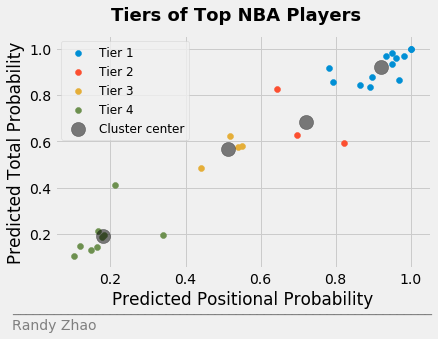

In [44]:
plt.style.use('fivethirtyeight')

tiers, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 1):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 3):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 0):
        cluster_3.append(x[i])
    elif(y_kmeans[i] == 2):
        cluster_4.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)
cluster_4 = np.vstack(cluster_4)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Tier 1")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Tier 2")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Tier 3")
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], label = "Tier 4")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "DejaVu Sans"})

ax.set_xlabel('Predicted Positional Probability')
ax.set_ylabel('Predicted Total Probability')

tiers.suptitle("Tiers of Top NBA Players", weight = 'bold', size = 18)

tiers.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

tiers.text(x = -0.02, y = -.14,
    s = 'Randy Zhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

tiers.savefig('Figures/tiers.png', dpi = 400, bbox_inches = 'tight')

